In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import numpy as np

In [11]:
file_path = '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/DLS-Zeta-Pico_Combined.xlsx' 
sheet_name = 'Sheet1' 
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [12]:
polymer_order = df['Polymer'][::-1]
n_p_ratios = df['N/P ratio'][::-1]
radius = df['Hydrodynamic Radius'][::-1]
Dstdev = df['DLS-stdev'][::-1]
zeta = df['Zeta Potential'][::-1]
zstdev = df['Zeta-stdev'][::-1]
pico = df['Avg. %'][::-1]
pstdev = df['Pico-stdev'][::-1]

In [13]:
np_ratio_colors = {
    '1.0': '#a559aa',   # N/P = 1
    '5.0': '#59a89c',   # N/P = 5
    '7.5': '#f0c561', # N/P = 7.5
    '10.0': '#e02b35'   # N/P = 10
}

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

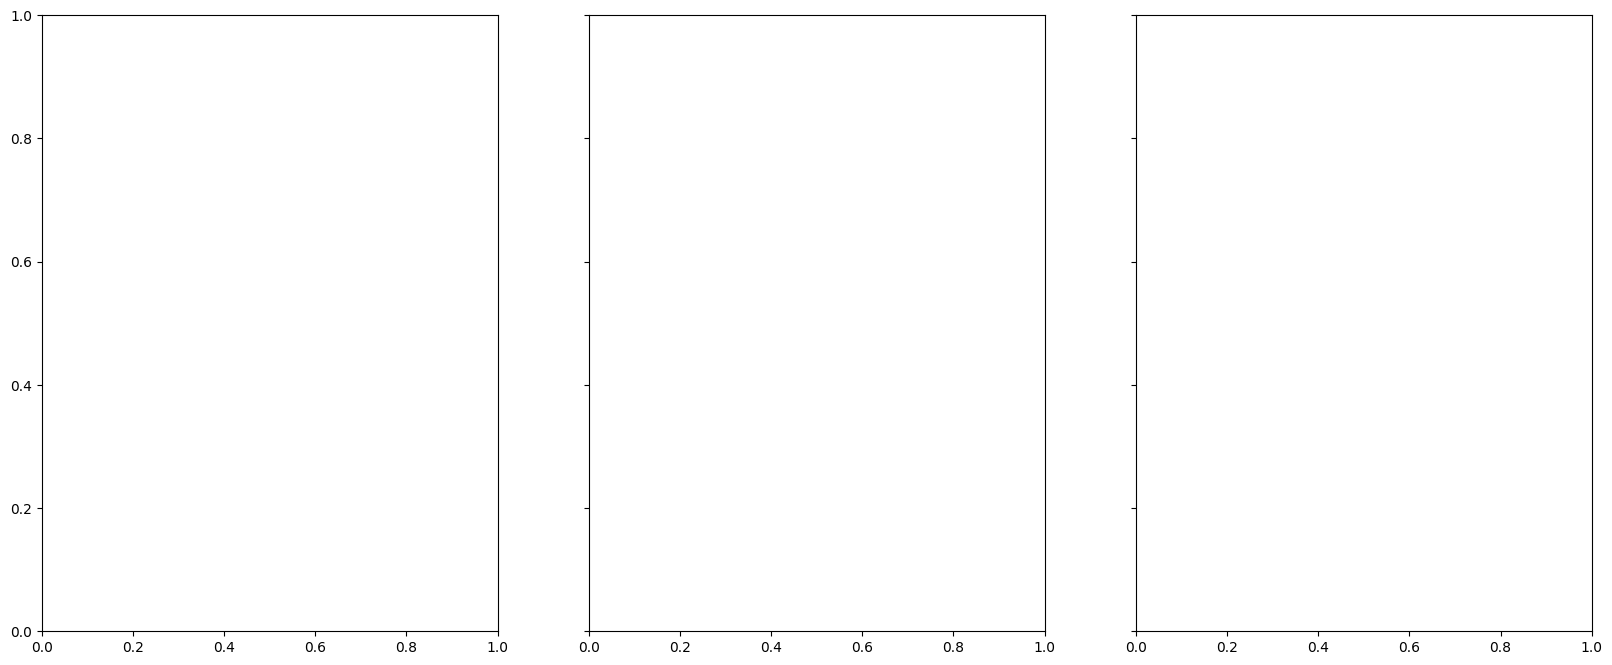

In [31]:
np_ratios = df['N/P ratio'].unique()
np_ratios.sort()
polymers = df['Polymer'].unique()

bar_data = {ratio: {polymer: {'radius': None, 'zeta': None, 'avg_percent': None,
                              'radius_err': None, 'zeta_err': None, 'avg_percent_err': None}
                    for polymer in polymers} for ratio in np_ratios}


for _, row in df.iterrows():

    ratio = row['N/P ratio']
    polymer = row['Polymer']
    bar_data[ratio][polymer]['radius'] = row['Hydrodynamic Radius'] if not np.isnan(row['Hydrodynamic Radius']) else 0
    bar_data[ratio][polymer]['zeta'] = row['Zeta Potential'] if not np.isnan(row['Zeta Potential']) else 0
    bar_data[ratio][polymer]['avg_percent'] = row['Avg. %'] if not np.isnan(row['Avg. %']) else 0
    bar_data[ratio][polymer]['radius_err'] = row['DLS-stdev'] if not np.isnan(row['DLS-stdev']) else 0
    bar_data[ratio][polymer]['zeta_err'] = row['Zeta-stdev'] if not np.isnan(row['Zeta-stdev']) else 0
    bar_data[ratio][polymer]['avg_percent_err'] = row['Pico-stdev'] if not np.isnan(row['Pico-stdev']) else 0


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

bar_width = 0.15  # width of the bars
index = np.arange(len(polymers))  # the label locations

for i, ratio in enumerate(np_ratios):

    diameter_vals = [bar_data[ratio][polymer]['radius'] for polymer in polymers]
    diameter_errs = [bar_data[ratio][polymer]['radius_err'] for polymer in polymers]
    zeta_vals = [bar_data[ratio][polymer]['zeta'] for polymer in polymers]
    zeta_errs = [bar_data[ratio][polymer]['zeta_err'] for polymer in polymers]
    avg_percent_vals = [bar_data[ratio][polymer]['avg_percent'] for polymer in polymers]
    avg_percent_errs = [bar_data[ratio][polymer]['avg_percent_err'] for polymer in polymers]

    adj_index = index + bar_width * i

    ax1.bar(adj_index, diameter_vals, bar_width, yerr=diameter_errs, label=f'N/P Ratio {ratio}')
    ax2.bar(adj_index, zeta_vals, bar_width, yerr=zeta_errs, label=f'N/P Ratio {ratio}')
    ax3.bar(adj_index, avg_percent_vals, bar_width, yerr=avg_percent_errs, label=f'N/P Ratio {ratio}')

ax1.set_ylabel('Polymers')
ax1.set_title('Effective Diameter Avg. (nm)')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(polymers)
ax1.legend()

ax2.set_title('Zeta Potential (mV)')
ax2.set_xticks(index + bar_width)
ax2.set_xticklabels(polymers)
ax2.legend()

ax3.set_title('Normalized Fluorescence Intensity (%)')
ax3.set_xticks(index + bar_width)
ax3.set_xticklabels(polymers)
ax3.legend()

plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

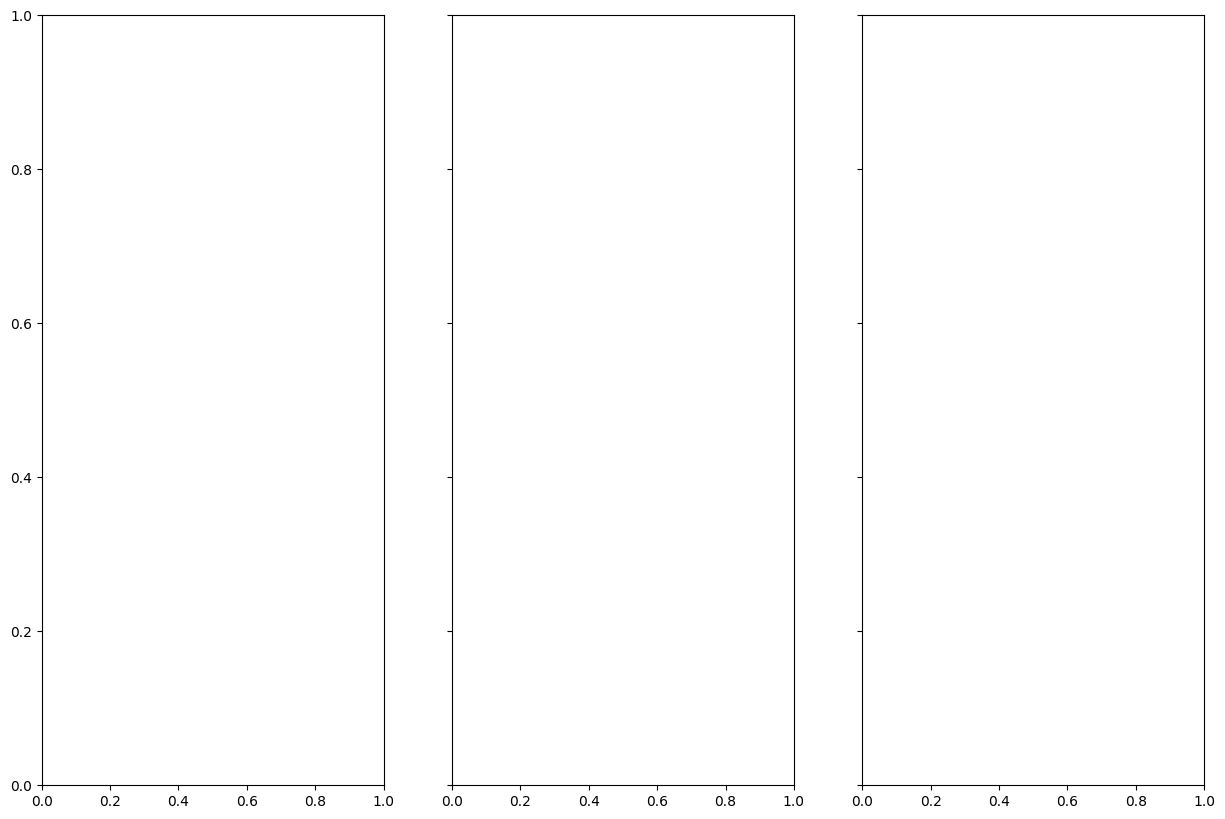

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df' is the DataFrame containing the data

# Reversing the DataFrame to fit the polymer_order
df_reversed = df.iloc[::-1]

# Get unique polymers and N/P ratios
np_ratios = df['N/P ratio'].unique()
np_ratios.sort()
polymers = df['Polymer'].unique()

# Set up the colors for each N/P ratio
np_ratio_colors = {
    0.0: '#082a54', 
    1.0: '#a559aa',   # N/P = 1
    5.0: '#59a89c',   # N/P = 5
    7.5: '#f0c561',   # N/P = 7.5
    10.0: '#e02b35'   # N/P = 10
}

# Initialize the bar_data dictionary
bar_data = {polymer: {ratio: {'radius': None, 'zeta': None, 'avg_percent': None,
                              'radius_err': None, 'zeta_err': None, 'avg_percent_err': None}
                      for ratio in np_ratios} for polymer in polymers}

# Populate bar_data with values from df
for _, row in df.iterrows():
    ratio = row['N/P ratio']
    polymer = row['Polymer']
    # Update bar_data with values, if NaN is found, replace with zero
    bar_data[polymer][ratio] = {
        'radius': row['Hydrodynamic Radius'] if pd.notna(row['Hydrodynamic Radius']) else 0,
        'radius_err': row['DLS-stdev'] if pd.notna(row['DLS-stdev']) else 0,
        'zeta': row['Zeta Potential'] if pd.notna(row['Zeta Potential']) else 0,
        'zeta_err': row['Zeta-stdev'] if pd.notna(row['Zeta-stdev']) else 0,
        'avg_percent': row['Avg. %'] if pd.notna(row['Avg. %']) else 0,
        'avg_percent_err': row['Pico-stdev'] if pd.notna(row['Pico-stdev']) else 0
    }

# Set the bar width and index for the bar chart
bar_width = 0.2
index = np.arange(len(polymers))

# Create subplots for the bar charts
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)

# Plot each bar chart
for ax, key in zip(axes, ['radius', 'zeta', 'avg_percent']):
    for i, ratio in enumerate(np_ratios):
        # Get the values and errors for the current N/P ratio
        values = [bar_data[polymer][ratio][key] for polymer in polymers]
        errors = [bar_data[polymer][ratio][f'{key}_err'] for polymer in polymers]

        # Set the position for each bar chart
        position = index - bar_width/2. + i * bar_width
        
        # Plot the bars
        ax.barh(position, values, bar_width, xerr=errors, label=f'N/P Ratio {ratio}',
                color=np_ratio_colors[ratio])

# Set the labels and titles for each subplot
axes[0].set_title('Hydrodynamic Radius (nm)')
axes[1].set_title('Zeta Potential (mV)')
axes[2].set_title('Normalized Fluorescence Intensity (%)')

# Set the y-axis labels and add a legend
axes[0].set_yticks(index)
axes[0].set_yticklabels(polymers)
axes[0].invert_yaxis()  # To have the first polymer at the top
axes[0].legend(title='N/P Ratio')

plt.tight_layout()
plt.show()
